In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
df_epl = pd.read_csv('df_epl_clean_with_dummies.csv')

In [3]:
df_epl.head()

,Unnamed: 0,Player,Age,MP,Starts,Min,90s,Gls,Ast,Height,...,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD
0,0,Patrick van Aanholt,28,29,29,2507,27.9,3,2,176.0,...,0,1,0,0,0,1,0,0,1,0
1,1,Max Aarons,19,36,36,3240,36.0,0,1,171.0,...,1,1,0,0,0,1,0,1,0,0
2,2,Tammy Abraham,21,34,25,2215,24.6,15,3,190.0,...,1,0,1,0,0,0,1,1,0,0
3,3,Adrián,32,11,9,875,9.7,0,0,190.0,...,1,0,0,1,0,0,1,0,1,0
4,4,Sergio Agüero,31,24,18,1452,16.1,16,3,173.0,...,1,0,1,0,0,0,1,0,0,1


In [4]:
df_epl.columns

Index(['Unnamed: 0', 'Player', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'Height', 'Market Value', 'Year', 'Foot_both', 'Foot_left',
       'Foot_right', 'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK', 'Pos_x_MF',
       'Squad_OTHER', 'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU',
       'Nation_WORLD'],
      dtype='object')

In [5]:
df_epl.drop('Unnamed: 0', axis=1, inplace=True)

## Super Clean DataFrame 
### with no extra columns - cleaned up after assessments in cross-val and regularization

In [6]:
df_epl_clean = df_epl.copy()

In [7]:
df_epl_clean.drop('MP', axis=1, inplace=True)

In [8]:
df_epl_clean.drop('Starts', axis=1, inplace=True)

In [9]:
df_epl_clean.drop('90s', axis=1, inplace=True)

In [10]:
df_epl_clean.drop('Height', axis=1, inplace=True)

In [11]:
df_epl_clean.drop('Year', axis=1, inplace=True)

In [12]:
df_epl_clean

,Player,Age,Min,Gls,Ast,Market Value,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD
0,Patrick van Aanholt,28,2507,3,2,7700000.0,0,1,0,1,0,0,0,1,0,0,1,0
1,Max Aarons,19,3240,0,1,22000000.0,0,0,1,1,0,0,0,1,0,1,0,0
2,Tammy Abraham,21,2215,15,3,41800000.0,0,0,1,0,1,0,0,0,1,1,0,0
3,Adrián,32,875,0,0,1100000.0,0,0,1,0,0,1,0,0,1,0,1,0
4,Sergio Agüero,31,1452,16,3,19800000.0,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Andi Zeqiri,21,171,0,0,2750000.0,0,1,0,1,0,0,0,1,0,0,1,0
949,Oleksandr Zinchenko,23,1478,0,0,27500000.0,0,1,0,1,0,0,0,0,1,0,1,0
950,Hakim Ziyech,27,1172,2,3,41800000.0,0,1,0,0,0,0,1,0,1,0,0,1
951,Kurt Zouma,25,2029,5,0,35200000.0,0,0,1,1,0,0,0,0,1,0,1,0


### Some Simple EDA

In [13]:
df_epl_clean.columns

Index(['Player', 'Age', 'Min', 'Gls', 'Ast', 'Market Value', 'Foot_both',
       'Foot_left', 'Foot_right', 'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK',
       'Pos_x_MF', 'Squad_OTHER', 'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU',
       'Nation_WORLD'],
      dtype='object')

In [14]:
# Making a new DF with the target in the last column for better plotting
df_super_clean = df_epl_clean.loc[:,['Player', 'Age', 'Min', 'Gls', 'Ast', 'Foot_both',
       'Foot_left', 'Foot_right', 'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK',
       'Pos_x_MF', 'Squad_OTHER', 'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU',
       'Nation_WORLD','Market Value']]

In [15]:
df_super_clean.head()

,Player,Age,Min,Gls,Ast,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD,Market Value
0,Patrick van Aanholt,28,2507,3,2,0,1,0,1,0,0,0,1,0,0,1,0,7700000.0
1,Max Aarons,19,3240,0,1,0,0,1,1,0,0,0,1,0,1,0,0,22000000.0
2,Tammy Abraham,21,2215,15,3,0,0,1,0,1,0,0,0,1,1,0,0,41800000.0
3,Adrián,32,875,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1100000.0
4,Sergio Agüero,31,1452,16,3,0,0,1,0,1,0,0,0,1,0,0,1,19800000.0


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


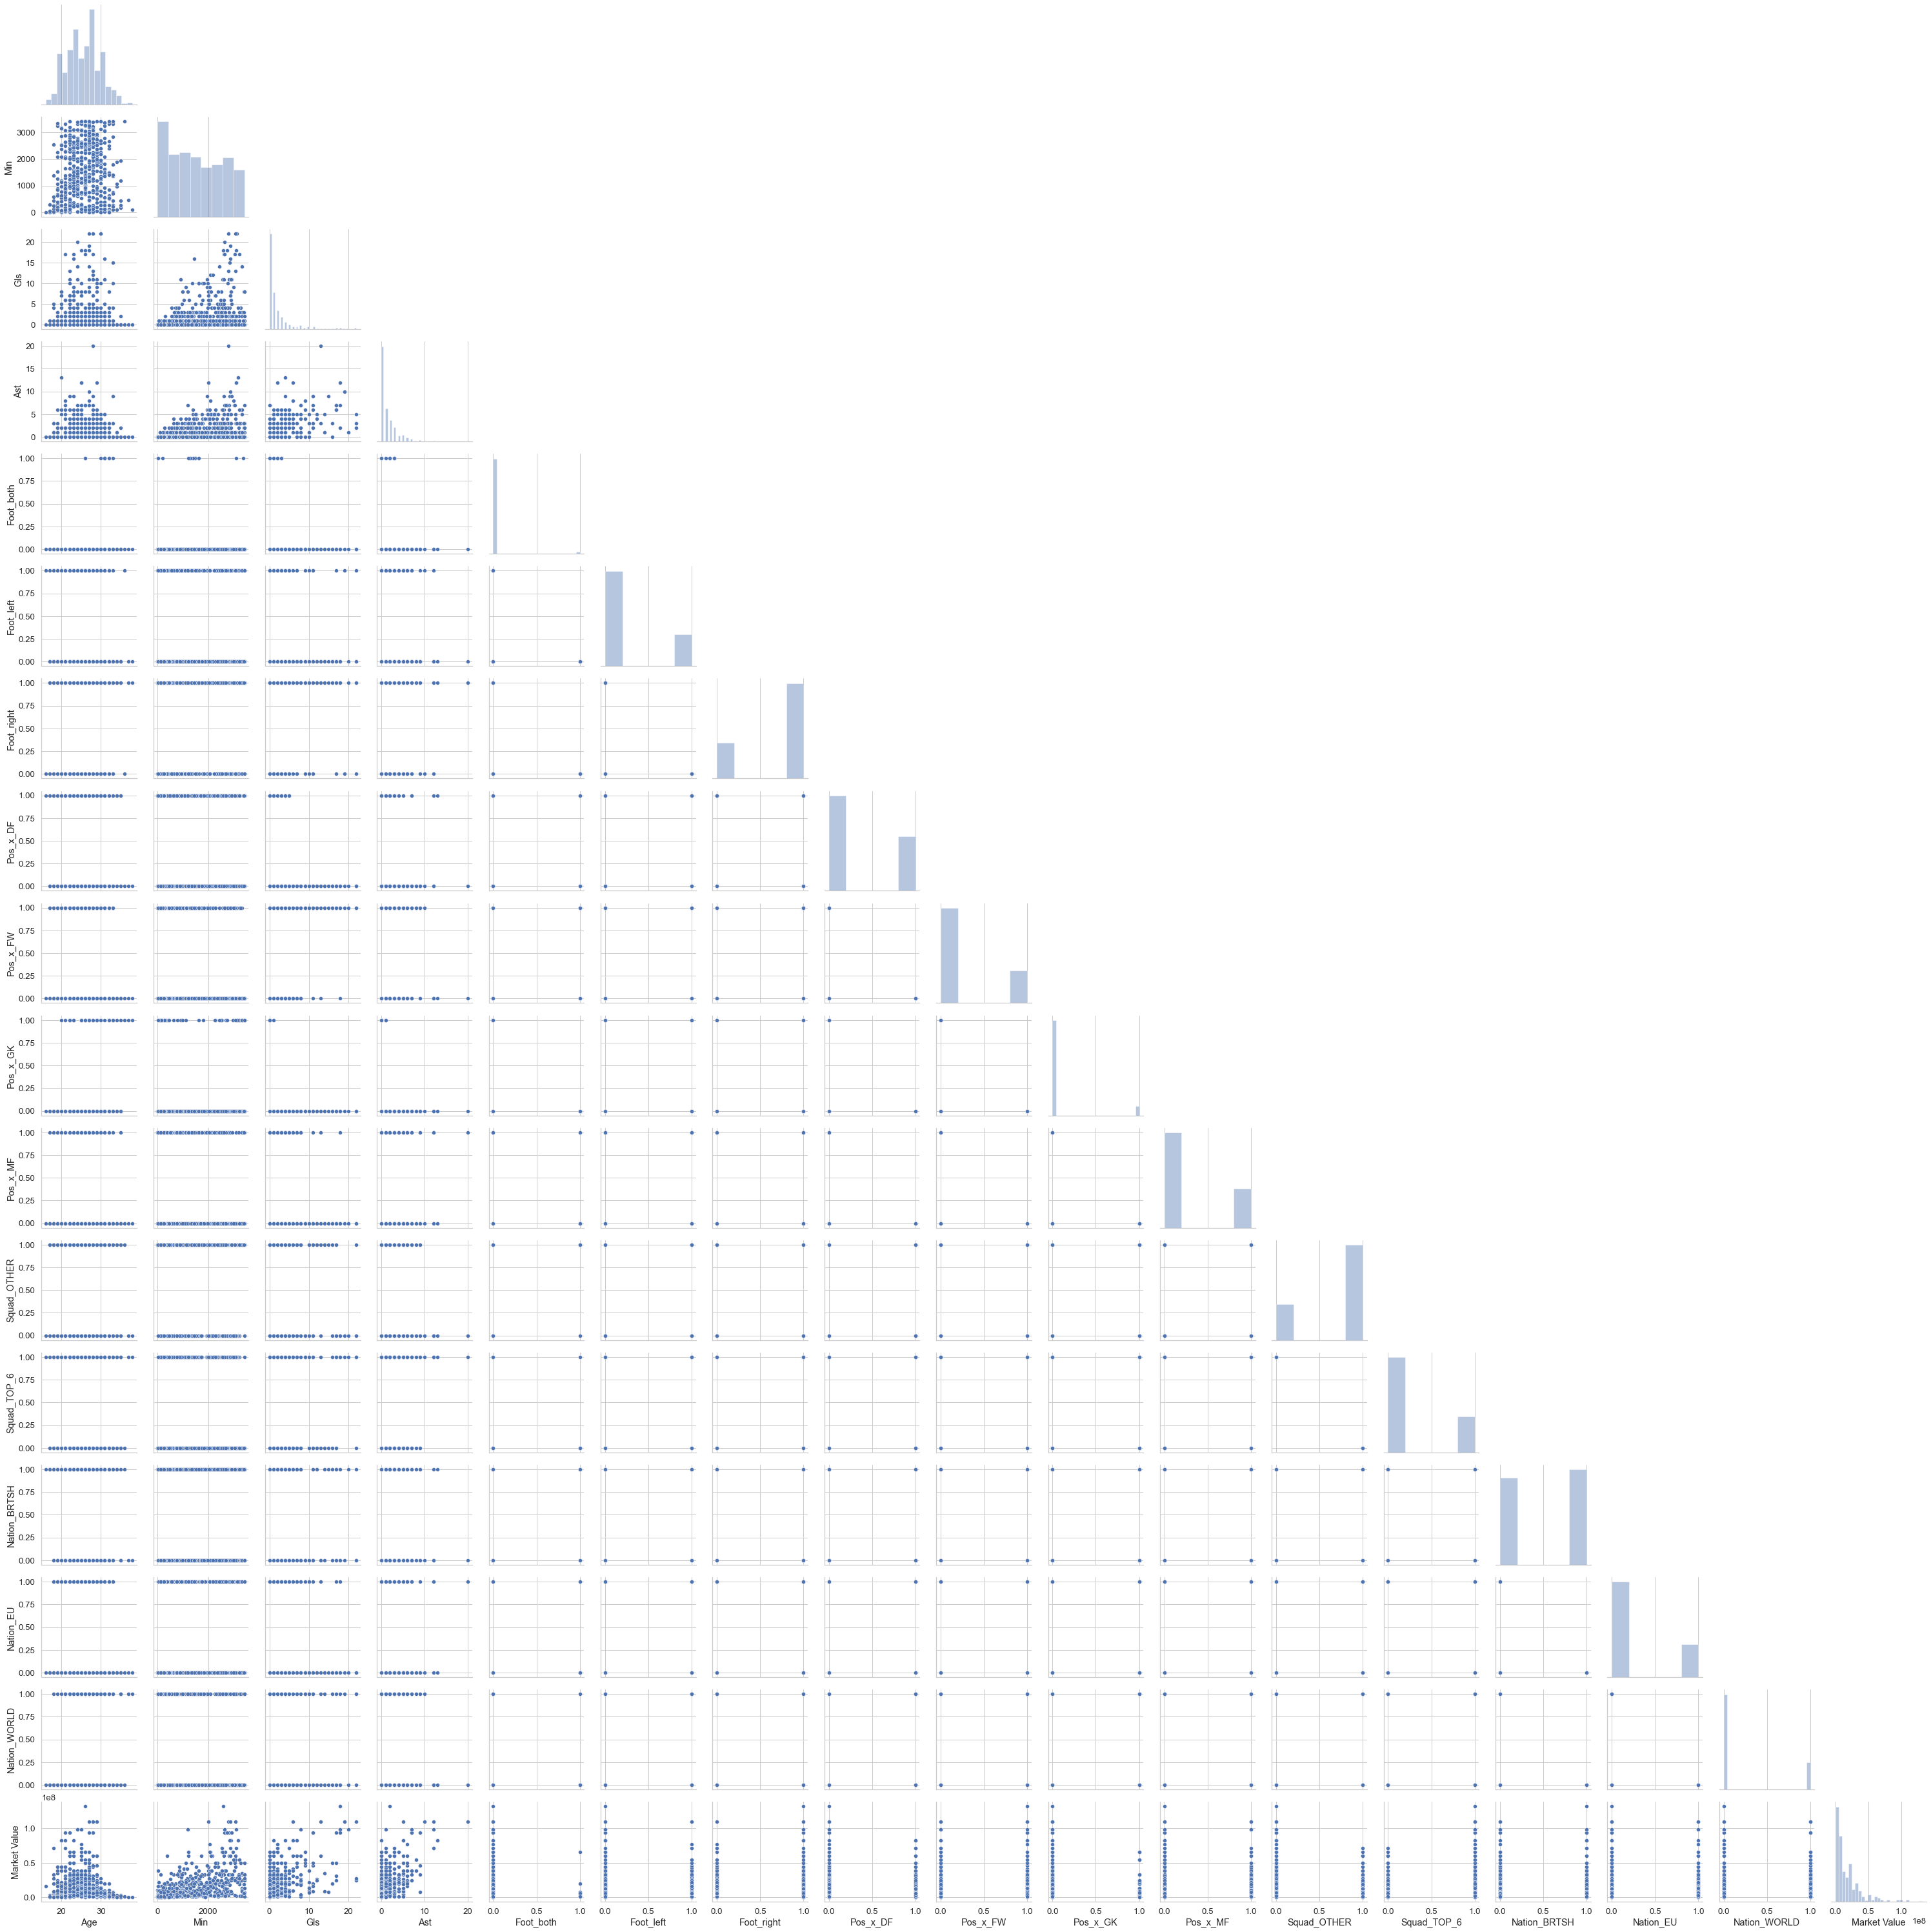

In [16]:
# Sometimtes plotting PairGrid takes a while, and we don't need to see *all* the data, so a sample will do
g = sns.PairGrid(df_super_clean.sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

### Setting up for the model for Standard Scaling & Regularizarion

In [17]:
#Separate our features from our target

X = df_super_clean.loc[:,['Age', 'Min', 'Gls', 'Ast', 'Foot_both',
       'Foot_left', 'Foot_right', 'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK',
       'Pos_x_MF', 'Squad_OTHER', 'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU',
       'Nation_WORLD']]

y = df_super_clean['Market Value']

# create overall quality squared term, which we expect to 
# help based on the relationship we see in the pair plot 
X['Age^2'] =(X['Age'])**2
X['Min^2'] = (X['Min'])**2
X['3^Gls'] = 3**(X['Gls'])
X['Ast^2'] = (X['Ast'])**2
# multiplicative interaction
X['Age_x_Min'] = X['Age'] * X['Min']
X['Age_x_Gls'] = X['Age'] * X['Gls']
X['Age_x_Ast'] = X['Age'] * X['Ast']

# division interaction
X['Ast_/_Min'] = X['Ast'] / X['Min']
X['Gls_/_Min'] = X['Gls'] / X['Min']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           953 non-null    int64  
 1   Min           953 non-null    int64  
 2   Gls           953 non-null    int64  
 3   Ast           953 non-null    int64  
 4   Foot_both     953 non-null    int64  
 5   Foot_left     953 non-null    int64  
 6   Foot_right    953 non-null    int64  
 7   Pos_x_DF      953 non-null    int64  
 8   Pos_x_FW      953 non-null    int64  
 9   Pos_x_GK      953 non-null    int64  
 10  Pos_x_MF      953 non-null    int64  
 11  Squad_OTHER   953 non-null    int64  
 12  Squad_TOP_6   953 non-null    int64  
 13  Nation_BRTSH  953 non-null    int64  
 14  Nation_EU     953 non-null    int64  
 15  Nation_WORLD  953 non-null    int64  
 16  Age^2         953 non-null    int64  
 17  Min^2         953 non-null    int64  
 18  3^Gls         953 non-null    

In [19]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [20]:
X_train.columns

Index(['Age', 'Min', 'Gls', 'Ast', 'Foot_both', 'Foot_left', 'Foot_right',
       'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK', 'Pos_x_MF', 'Squad_OTHER',
       'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU', 'Nation_WORLD', 'Age^2',
       'Min^2', '3^Gls', 'Ast^2', 'Age_x_Min', 'Age_x_Gls', 'Age_x_Ast',
       'Ast_/_Min', 'Gls_/_Min'],
      dtype='object')

In [21]:
X_train.shape

(571, 25)

In [22]:
X_val.shape

(191, 25)

In [23]:
X_test.shape

(191, 25)

## Standard Scaling

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:

## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [26]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [27]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [28]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [29]:
row, col = X_tr.shape

In [30]:
print(col)

25


In [31]:
print(range(col))

range(0, 25)


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

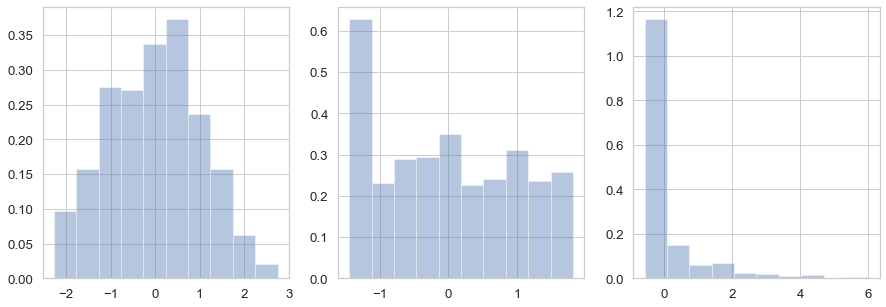

In [32]:
## Here we can plot histograms of a few transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#for i in range(col):
sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)
#sns.distplot(X_tr[:, 3], label='feature 4', ax=axes[3], kde=False, bins=10, norm_hist=True)

## LASSO

In [33]:
selected_columns = ['Age', 'Min', 'Gls', 'Ast', 'Foot_both', 'Foot_left', 'Foot_right',
       'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK', 'Pos_x_MF', 'Squad_OTHER',
       'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU', 'Nation_WORLD', 'Age^2',
       'Min^2', '3^Gls', 'Ast^2', 'Age_x_Min', 'Age_x_Gls', 'Age_x_Ast',
       'Ast_/_Min', 'Gls_/_Min',]

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 734 to 486
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           571 non-null    int64  
 1   Min           571 non-null    int64  
 2   Gls           571 non-null    int64  
 3   Ast           571 non-null    int64  
 4   Foot_both     571 non-null    int64  
 5   Foot_left     571 non-null    int64  
 6   Foot_right    571 non-null    int64  
 7   Pos_x_DF      571 non-null    int64  
 8   Pos_x_FW      571 non-null    int64  
 9   Pos_x_GK      571 non-null    int64  
 10  Pos_x_MF      571 non-null    int64  
 11  Squad_OTHER   571 non-null    int64  
 12  Squad_TOP_6   571 non-null    int64  
 13  Nation_BRTSH  571 non-null    int64  
 14  Nation_EU     571 non-null    int64  
 15  Nation_WORLD  571 non-null    int64  
 16  Age^2         571 non-null    int64  
 17  Min^2         571 non-null    int64  
 18  3^Gls         571 non-null  

In [35]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [36]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [37]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4731172261550072e+16, tolerance: 16908209003315.783
  model = cd_fast.enet_coordinate_descent_gram(
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726834417479136.0, tolerance: 16908209003315.783
  model = cd_fast.enet_coordinate_descent_gram(
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5443144361308568e+16, tolerance: 17177058720738.299
  model = cd_fast.enet_coordinate_descent_gram(
/Us

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [38]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

95.47716114208056

In [39]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Age', 12800894.437741911),
 ('Min', 20475013.229132973),
 ('Gls', 23920192.83122466),
 ('Ast', 9401467.846362978),
 ('Foot_both', 618067.7536180745),
 ('Foot_left', -296841.7008648856),
 ('Foot_right', 0.0),
 ('Pos_x_DF', -514735.5714925395),
 ('Pos_x_FW', -129107.48674232051),
 ('Pos_x_GK', -549698.1545933838),
 ('Pos_x_MF', 442505.07881605084),
 ('Squad_OTHER', -7314300.000703526),
 ('Squad_TOP_6', 2.4314503352224635e-07),
 ('Nation_BRTSH', -1772223.5482015356),
 ('Nation_EU', -17741.953229510018),
 ('Nation_WORLD', 134333.42700243686),
 ('Age^2', -12920955.103539217),
 ('Min^2', 3692880.772872209),
 ('3^Gls', 744598.3637220141),
 ('Ast^2', 4340553.2423117515),
 ('Age_x_Min', -18852335.48581368),
 ('Age_x_Gls', -18928506.838630326),
 ('Age_x_Ast', -10673360.770853182),
 ('Ast_/_Min', 485361.2617683182),
 ('Gls_/_Min', -542369.4166590368)]

In [40]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [41]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [42]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

7856451.605622319

In [43]:
r2_score(y_test, test_set_pred)


0.6450347772759658

## Ridge

In [44]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)

Ridge_model = RidgeCV(alphas = alphavec, cv=5)
Ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [45]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
Ridge_model.alpha_

100.0

In [46]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, Ridge_model.coef_))

[('Age', -1973038.3516799002),
 ('Min', 3731168.227226527),
 ('Gls', 3634729.4937689514),
 ('Ast', 2081588.4878230265),
 ('Foot_both', 584100.0569448436),
 ('Foot_left', -212023.6286998255),
 ('Foot_right', -15426.230038535981),
 ('Pos_x_DF', -272249.6231741594),
 ('Pos_x_FW', -374825.4936841323),
 ('Pos_x_GK', 135707.0884518254),
 ('Pos_x_MF', 567748.9766863203),
 ('Squad_OTHER', -3374039.1037017084),
 ('Squad_TOP_6', 3374039.1037017293),
 ('Nation_BRTSH', -1064244.6892092482),
 ('Nation_EU', 717107.0253922839),
 ('Nation_WORLD', 519713.9868815812),
 ('Age^2', -2858047.5854846006),
 ('Min^2', 2920342.2000088077),
 ('3^Gls', -677007.6374922591),
 ('Ast^2', 2324778.0646585473),
 ('Age_x_Min', -549658.4431472825),
 ('Age_x_Gls', 553804.4338097309),
 ('Age_x_Ast', -870837.2501156216),
 ('Ast_/_Min', 250093.25912092358),
 ('Gls_/_Min', 739224.5322035612)]

In [47]:
# Make predictions on the test set using the new model
test_set_pred_ridge = Ridge_model.predict(X_te)

In [48]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred_ridge)

9195540.841288583

In [49]:
r2_score(y_test, test_set_pred_ridge)

0.5548964187247365

# => LASSO MODEL WINS! 


## @ R^2 = 0.6450347772759658

## @ MAE = 7856451.605622319

In [50]:
y_predict = lasso_model.predict(X_test)

In [51]:
print(lasso_model.coef_)

[ 1.28008944e+07  2.04750132e+07  2.39201928e+07  9.40146785e+06
  6.18067754e+05 -2.96841701e+05  0.00000000e+00 -5.14735571e+05
 -1.29107487e+05 -5.49698155e+05  4.42505079e+05 -7.31430000e+06
  2.43145034e-07 -1.77222355e+06 -1.77419532e+04  1.34333427e+05
 -1.29209551e+07  3.69288077e+06  7.44598364e+05  4.34055324e+06
 -1.88523355e+07 -1.89285068e+07 -1.06733608e+07  4.85361262e+05
 -5.42369417e+05]


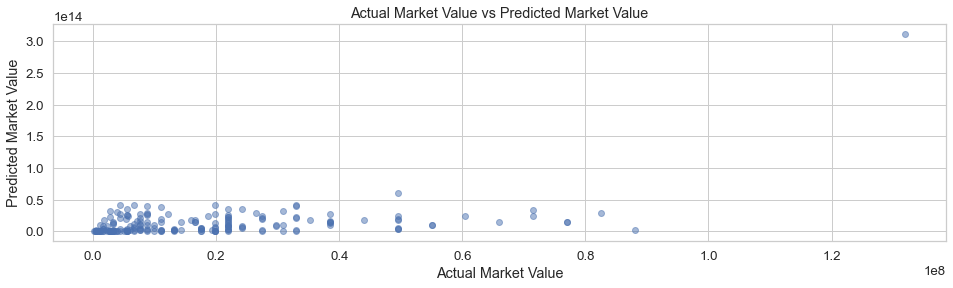

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(1,figsize=(16,4))
plt.scatter(y_test,y_predict,alpha=.5)
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual Market Value vs Predicted Market Value')
plt.show()
plt.savefig('Predic_.png')

In [53]:
residuals = y_predict - y_test

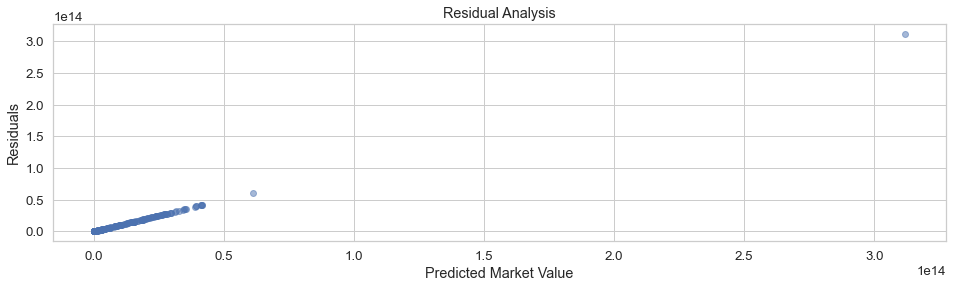

In [54]:
plt.figure(1,figsize=(16,4))
plt.scatter(y_predict,residuals,alpha=.5)
plt.xlabel('Predicted Market Value')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

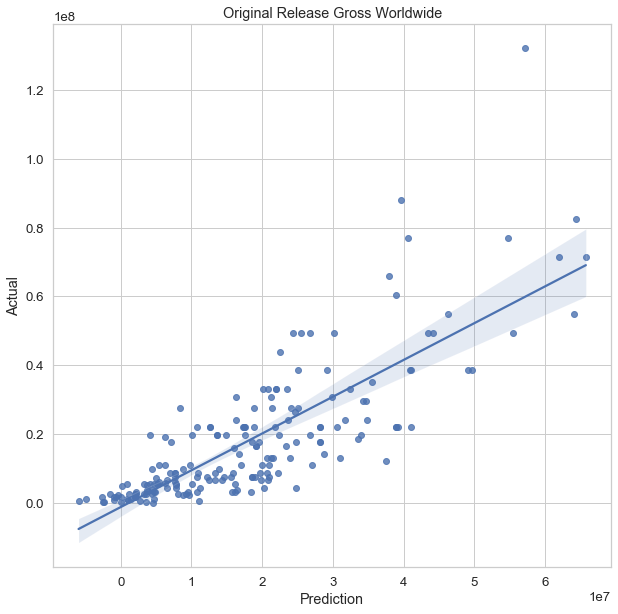

In [59]:
plt.figure(1,figsize=(10,10))
fig = sns.regplot(x = test_set_pred, y = y_test)
fig.set(xlabel='Prediction',ylabel = 'Actual', title = 'Original Release Gross Worldwide')
plt.savefig('Actualvspredictionline.png')

/var/folders/3b/d88c396s1jx1hf72ltg_cc4r0000gn/T/ipykernel_31214/1099417602.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,elev=elev,azim=azim)


AttributeError: 'XAxis' object has no attribute 'set_ticklable'

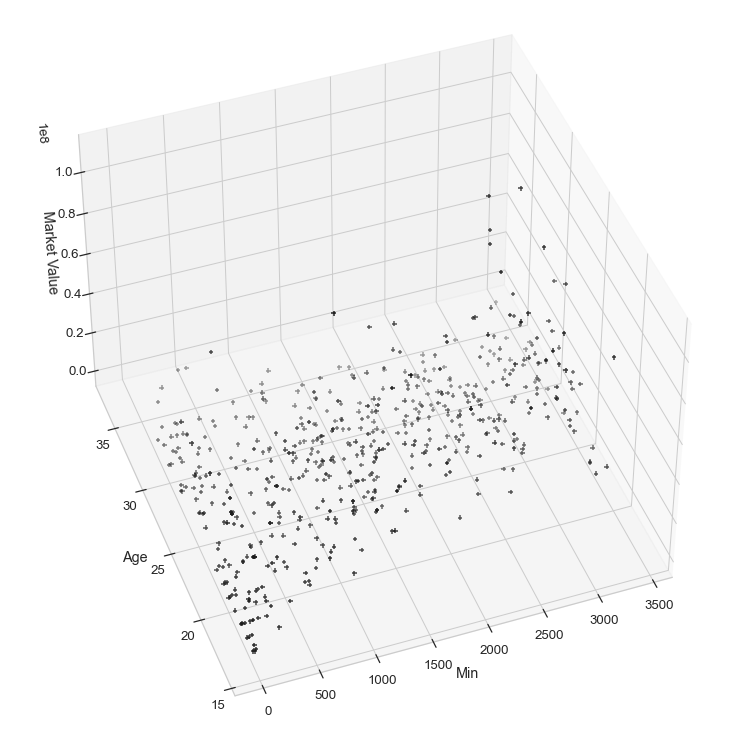

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(10,10))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig,elev=elev,azim=azim)

ax.scatter( X_train[['Min']], X_train[['Age']], y_train, c='k',marker = '+' )
#ols = LinearRegression
#ols.fit(X_train,y_train)
#ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Min')
ax.set_ylabel('Age')
ax.set_zlabel('Market Value')

ax.w_xaxis.set_ticklable([])
ax.w_yaxis.set_ticklable([])
ax.w_zaxis.set_ticklable([])


In [60]:
df_super_clean.head()

,Player,Age,Min,Gls,Ast,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD,Market Value
0,Patrick van Aanholt,28,2507,3,2,0,1,0,1,0,0,0,1,0,0,1,0,7700000.0
1,Max Aarons,19,3240,0,1,0,0,1,1,0,0,0,1,0,1,0,0,22000000.0
2,Tammy Abraham,21,2215,15,3,0,0,1,0,1,0,0,0,1,1,0,0,41800000.0
3,Adrián,32,875,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1100000.0
4,Sergio Agüero,31,1452,16,3,0,0,1,0,1,0,0,0,1,0,0,1,19800000.0


In [61]:
df_super_clean.tail()

,Player,Age,Min,Gls,Ast,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD,Market Value
948,Andi Zeqiri,21,171,0,0,0,1,0,1,0,0,0,1,0,0,1,0,2750000.0
949,Oleksandr Zinchenko,23,1478,0,0,0,1,0,1,0,0,0,0,1,0,1,0,27500000.0
950,Hakim Ziyech,27,1172,2,3,0,1,0,0,0,0,1,0,1,0,0,1,41800000.0
951,Kurt Zouma,25,2029,5,0,0,0,1,1,0,0,0,0,1,0,1,0,35200000.0
952,Martin Ødegaard,21,866,1,2,0,1,0,0,0,0,1,0,1,0,1,0,44000000.0


In [62]:
df_super_clean[df_super_clean['Player'] == 'Martin Ødegaard']

,Player,Age,Min,Gls,Ast,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD,Market Value
235,James Maddison,22,2624,6,3,0,0,1,0,0,0,1,1,0,1,0,0,60500000.0
718,James Maddison,23,2099,8,5,0,0,1,0,1,0,0,1,0,1,0,0,60500000.0


In [63]:
df_super_clean.iloc[235]

Player          James Maddison
Age                         22
Min                       2624
Gls                          6
Ast                          3
Foot_both                    0
Foot_left                    0
Foot_right                   1
Pos_x_DF                     0
Pos_x_FW                     0
Pos_x_GK                     0
Pos_x_MF                     1
Squad_OTHER                  1
Squad_TOP_6                  0
Nation_BRTSH                 1
Nation_EU                    0
Nation_WORLD                 0
Market Value        60500000.0
Name: 235, dtype: object

In [ ]:
'''selected_columns = ['Age', 'Min', 'Gls', 'Ast', 'Foot_both', 'Foot_left', 'Foot_right',
       'Pos_x_DF', 'Pos_x_FW', 'Pos_x_GK', 'Pos_x_MF', 'Squad_OTHER',
       'Squad_TOP_6', 'Nation_BRTSH', 'Nation_EU', 'Nation_WORLD', 'Age^2',
       'Min^2', '3^Gls', 'Ast^2', 'Age_x_Min', 'Age_x_Gls', 'Age_x_Ast',
       'Ast_/_Min', 'Gls_/_Min',]'''

In [ ]:
#def Player_Value(player):
    

In [64]:
Tammy_Abraham = [[21,2215,15,3,
            0,0,1,0,1,0,0,0,1,1,0,0,21**2,2215**2,3**(15),3**2,21*2215,21*15,21*3,3/2215,15/2215]]

In [65]:
Maddison = [[22,2624,6,3,0,0,1,0,0,0,1,1,0,1,0,0,22**2,2624**2,3**6,3**2,22*2624,22*6,22*3,3/2624,6/2624]]

In [66]:
print(Tammy_Abraham)

[[21, 2215, 15, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 441, 4906225, 14348907, 9, 46515, 315, 63, 0.0013544018058690745, 0.006772009029345372]]


In [67]:
y_predict_Abraham = lasso_model.predict(Tammy_Abraham)

In [68]:
print('Predicted Market Value of the Abraham: '+ str(y_predict_Abraham))

Predicted Market Value of the Abraham: [2.79590898e+13]


In [69]:
y_predict_maddison = lasso_model.predict(Maddison)

In [70]:
print('Predicted Market Value of the Abraham: '+ str(y_predict_maddison))

Predicted Market Value of the Abraham: [2.43838787e+13]


In [71]:
print(y_predict_player/1000000)

NameError: name 'y_predict_player' is not defined

In [78]:
df_super_clean[df_super_clean['Player'] == 'Dominic Calvert-Lewin']

,Player,Age,Min,Gls,Ast,Foot_both,Foot_left,Foot_right,Pos_x_DF,Pos_x_FW,Pos_x_GK,Pos_x_MF,Squad_OTHER,Squad_TOP_6,Nation_BRTSH,Nation_EU,Nation_WORLD,Market Value
57,Dominic Calvert-Lewin,22,2626,13,1,0,0,1,0,1,0,0,1,0,1,0,0,49500000.0
518,Dominic Calvert-Lewin,23,2871,16,0,0,0,1,0,1,0,0,1,0,1,0,0,49500000.0


In [80]:
lewin= [[22,2626,13,1,0,0,1,0,1,0,0,1,0,1,0,0,22**2,2626**2,3**13,2**1,22*2626,22*13,22*1,1/2626,13/2626]]

In [81]:
y_predict_lewin = lasso_model.predict(lewin)

In [82]:
print('Predicted Market Value of the Abraham: '+ str(y_predict_lewin))

Predicted Market Value of the Abraham: [2.56061252e+13]
